# Assignment (Healthcare and Artificial Intelligence)
The objective of this assignment is to get you familiarize with  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://iiitaphyd-my.sharepoint.com/personal/manasa_k_research_iiit_ac_in/_layouts/15/onedrive.aspx?ct=1622206906840&or=OWA).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `name.ipynb` and submit the notebook file on Github Repo with plots/vizualizations saved.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installing Libraries
#!pip install scikit-learn matplotlib Pillow

In [2]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn import preprocessing

# Models
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [3]:
opt = {
    'image_size': 32,   
    'is_grayscale': True,   #True
    'val_split': 0.75
}

### Load Dataset

In [4]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [5]:

!ls '/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset'

IIIT-CFW      IMFDB	 Yale_face_database
IIIT-CFW.zip  IMFDB.zip  Yale_face_database.zip


In [6]:

# Loading the dataset
# eg.
!unzip "/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IMFDB" -d "/content"

dirpath = '/content/IMFDB'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

Archive:  /content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IMFDB.zip
   creating: /content/IMFDB/
  inflating: /content/IMFDB/ShilpaShetty_0.png  
  inflating: /content/__MACOSX/IMFDB/._ShilpaShetty_0.png  
  inflating: /content/IMFDB/MadhuriDixit_49.png  
  inflating: /content/__MACOSX/IMFDB/._MadhuriDixit_49.png  
  inflating: /content/IMFDB/Kajol_36.png  
  inflating: /content/__MACOSX/IMFDB/._Kajol_36.png  
  inflating: /content/IMFDB/Kajol_22.png  
  inflating: /content/__MACOSX/IMFDB/._Kajol_22.png  
  inflating: /content/IMFDB/AkshayKumar_46.png  
  inflating: /content/__MACOSX/IMFDB/._AkshayKumar_46.png  
  inflating: /content/IMFDB/ShilpaShetty_27.png  
  inflating: /content/__MACOSX/IMFDB/._ShilpaShetty_27.png  
  inflating: /content/IMFDB/ShilpaShetty_33.png  
  inflating: /content/__MACOSX/IMFDB/._ShilpaShetty_33.png  
  inflating: /content/IMFDB/Amir_9.png  
  inflating: /content/__MACOSX/IMFDB/._Amir_9.png  
  inflating: /content/IMFDB/SharukhKhan_48.png  

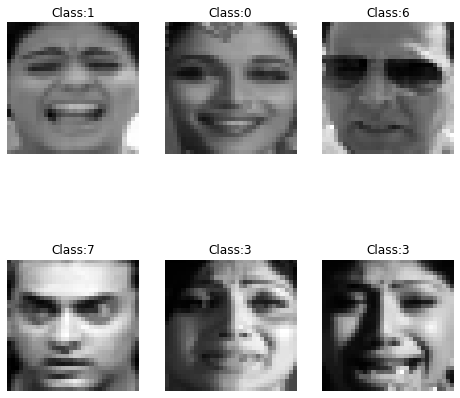

In [7]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

In [8]:
!unzip "/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IIIT-CFW" -d "/content"
dirpath = '/content/IIIT-CFW/'
X_1,y_1 = load_data(dirpath)
N_1,H_1,W_1 = X_1.shape[0:3]
C = 1 if opt['is_grayscale'] else X_1.shape[3]

Archive:  /content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IIIT-CFW.zip
   creating: /content/IIIT-CFW/
  inflating: /content/IIIT-CFW/VladimirPutin_0034.png  
  inflating: /content/__MACOSX/IIIT-CFW/._VladimirPutin_0034.png  
  inflating: /content/IIIT-CFW/ManmohanSingh_0039.png  
  inflating: /content/__MACOSX/IIIT-CFW/._ManmohanSingh_0039.png  
  inflating: /content/IIIT-CFW/VladimirPutin_0020.png  
  inflating: /content/__MACOSX/IIIT-CFW/._VladimirPutin_0020.png  
  inflating: /content/IIIT-CFW/VladimirPutin_0008.png  
  inflating: /content/__MACOSX/IIIT-CFW/._VladimirPutin_0008.png  
  inflating: /content/IIIT-CFW/ManmohanSingh_0005.png  
  inflating: /content/__MACOSX/IIIT-CFW/._ManmohanSingh_0005.png  
  inflating: /content/IIIT-CFW/ManmohanSingh_0011.png  
  inflating: /content/__MACOSX/IIIT-CFW/._ManmohanSingh_0011.png  
  inflating: /content/IIIT-CFW/BarackObama_0020.png  
  inflating: /content/__MACOSX/IIIT-CFW/._BarackObama_0020.png  
  inflating: /content/I

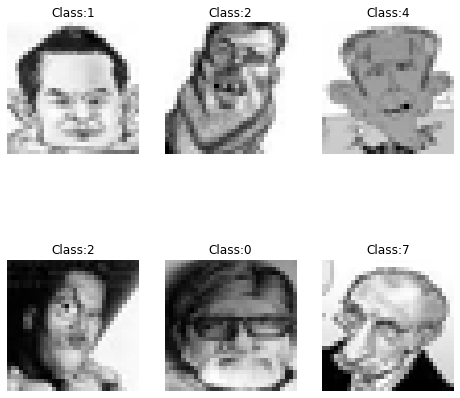

In [9]:
# Show sample images
ind = np.random.randint(0,y_1.shape[0],6)
disply_images(X_1[ind,...],y_1[ind], row=2,col=3)

In [10]:
!unzip "/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/Yale_face_database" -d "/content"
dirpath = '/content/Yale_face_database/'
X_2,y_2 = load_data(dirpath)
N_2,H_2,W_2 = X_2.shape[0:3]
C = 1 if opt['is_grayscale'] else X_2.shape[3]

Archive:  /content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/Yale_face_database.zip
   creating: /content/Yale_face_database/
  inflating: /content/Yale_face_database/12_4.png  
  inflating: /content/__MACOSX/Yale_face_database/._12_4.png  
  inflating: /content/Yale_face_database/10_6.png  
  inflating: /content/__MACOSX/Yale_face_database/._10_6.png  
  inflating: /content/Yale_face_database/8_0.png  
  inflating: /content/__MACOSX/Yale_face_database/._8_0.png  
  inflating: /content/Yale_face_database/14_2.png  
  inflating: /content/__MACOSX/Yale_face_database/._14_2.png  
  inflating: /content/Yale_face_database/14_3.png  
  inflating: /content/__MACOSX/Yale_face_database/._14_3.png  
  inflating: /content/Yale_face_database/8_1.png  
  inflating: /content/__MACOSX/Yale_face_database/._8_1.png  
  inflating: /content/Yale_face_database/7_10.png  
  inflating: /content/__MACOSX/Yale_face_database/._7_10.png  
  inflating: /content/Yale_face_database/10_7.png  
  infla

In [11]:
len(set(y_2))

15

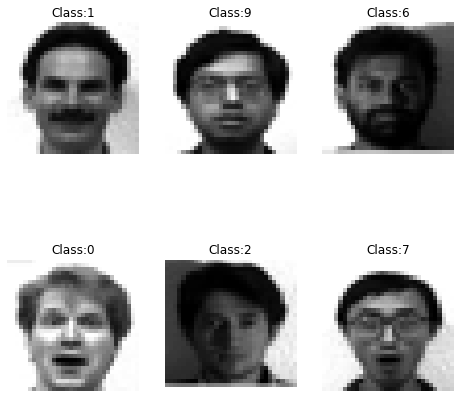

In [12]:
# Show sample images
ind = np.random.randint(0,y_2.shape[0],6)
disply_images(X_2[ind,...],y_2[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features


---


In [16]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

In [17]:
X_1 = X_1.reshape((N_1,H_1*W_1*C))

In [18]:
X_2 = X_2.reshape((N_2,H_2*W_2*C))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [19]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    global pca
    pca = PCA(n_components=k, whiten=True)
    X_k = pca.fit_transform(X)
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
    #plt.show()
    
    return X_k


IMFDB

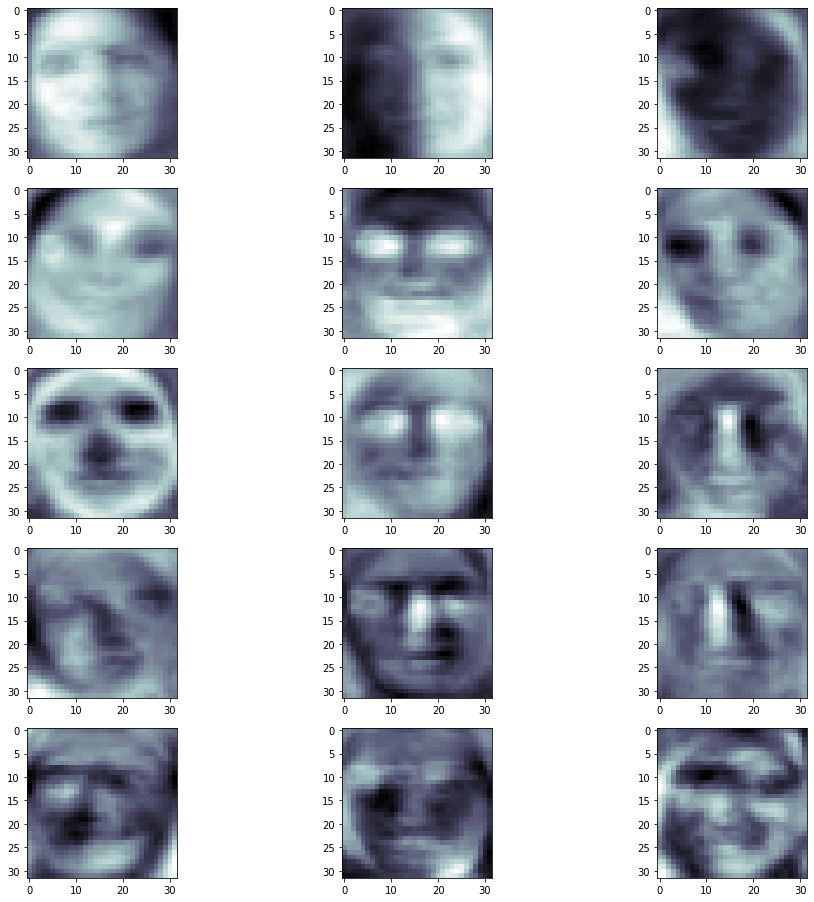

In [20]:
get_pca(X, 0.90)
fig = plt.figure(figsize=(16, 16))
for i in range(15):
    ax = fig.add_subplot(5, 3, i + 1)
    ax.imshow(pca.components_[i].reshape(H, W),
              cmap=plt.cm.bone)

IIIT-CFW

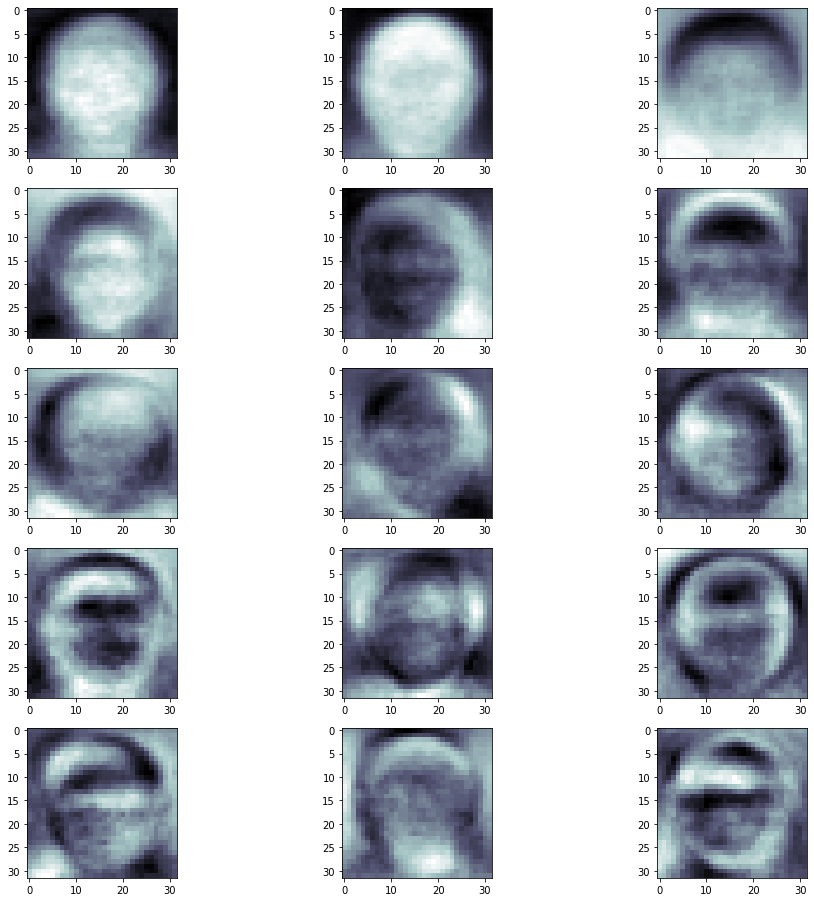

In [21]:
get_pca(X_1, 0.90)
fig = plt.figure(figsize=(16, 16))
for i in range(15):
    ax = fig.add_subplot(5, 3, i + 1)
    ax.imshow(pca.components_[i].reshape(H_1, W_1),
              cmap=plt.cm.bone)

Yale Face Database

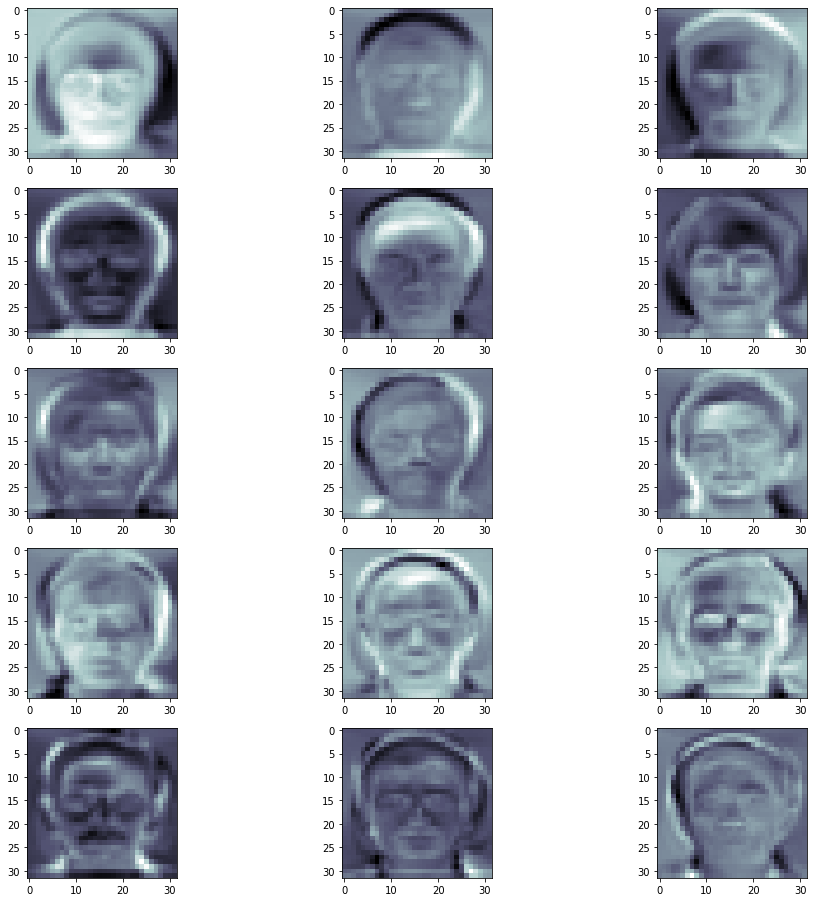

In [22]:
get_pca(X_2, 0.90)
fig = plt.figure(figsize=(16, 16))
for i in range(15):
    ax = fig.add_subplot(5, 3, i + 1)
    ax.imshow(pca.components_[i].reshape(H_2, W_2),
              cmap=plt.cm.bone)

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [23]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    global kpca
    kpca = KernelPCA(n_components=k, kernel='rbf', fit_inverse_transform=True)
    X_k = kpca.fit_transform(X)

    return X_k


### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.


Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [24]:
def get_lda(X,y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    global lda 
    lda = LDA(n_components = k)
    X_k = lda.fit_transform(X,y)
    return X_k

Checking Fisher Faces' performance

In [27]:
def fisher(X, y, n_comp, k):
  acc = []
  skfolds = StratifiedKFold(n_splits = 2)
  for train, test in skfolds.split(X,y):
    pca = PCA(n_components=(len(X[train]) - 7))
    pca.fit(X[train])
    
    lda = LDA()
    #Compute LDA of reduced data
    lda.fit(pca.transform(X[train]), y[train])
    ypred = lda.predict(pca.transform(X[test]))

    #Compute classification error
    outVal = accuracy_score(y[test], ypred)
    acc.append(outVal)
  
  print('Accuracy Score: ' + str(sum(acc)/2))

In [28]:
#IMFDB
fisher(X, y, 0.90, 7)

Accuracy Score: 0.3875


In [29]:
#IIIT-CFW
fisher(X_1, y_1, 0.90, 7)

Accuracy Score: 0.1875


In [30]:
#Yale
fisher(X_2, y_2, 0.90, 7)


Accuracy Score: 0.7458125183661475


In [31]:
def fisherFace(X, y, n_comp, k):

  global ldaT
  pcaT = get_pca(X, n_comp)
  ldaT = get_lda(pcaT, y, k)

  #plotting fisher faces
  plt.figure()
  for i in range(4):
    ax = plt.subplot(2,2,i+1)
    im = pca.inverse_transform(lda.scalings_[:,i])
    im.shape = [32,32]
    plt.xticks([]), plt.yticks([])
    ax.imshow(im)
  plt.show()

Fisher Faces of IMFDB

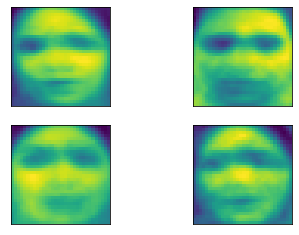

In [32]:
fisherFace(X,y,0.90,7)

Fisher Faces of IIIT-CFW

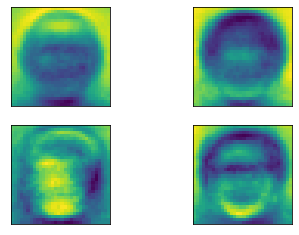

In [33]:
fisherFace(X_1,y_1,44,7)

Fisher Faces of Yale Face Database

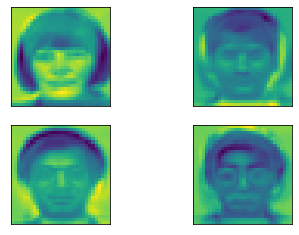

In [34]:
fisherFace(X_2,y_2,0.959,7)

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [35]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """

    pca = get_kernel_pca(X, k, kernel='rbf')
    X_k = get_lda(pca, y, 7)
    
    return X_k

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.


In [36]:
def get_vgg_features(dirpath):

    features = np.load(dirpath)
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 



In [37]:
def get_resnet_features(dirpath):
    
    features = np.load(dirpath)
    return features

# Questions


## Question 1

1(a). What are eigen faces? 

1(b). How many eigen vectors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples and make a convincing argument.

1(c). Reconstruct  the  image  back for each case

1(d). Which person/identity is difficult to represent compactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers

## Answer 1(a)


Eigenfaces are nothing but eigenvectors. When dealing with the "face" problem space, eigenvectors are referred to as eigenfaces.

Eigenfaces are basically a result of the concept that not all parts of the face are useful or important for face recognition problems. Just like how humans look at the places with maximum variation to recognise a person, PCA takes in all the images as a whole, keeps only the important parts (with maximum variation) and discards the rest. These important parts are the eigenvectors, i.e., eigenfaces.

In the cells below, the difference between original photos and eigenfaces can be seen. 

In [38]:
def originalPhotos(im):
  fig, axes = plt.subplots(5,5,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})
  print("Original Images:")
  for i,ax in enumerate(axes.flat):
    ax.imshow(np.array(im)[i].reshape(H,W), cmap='gray')
  plt.show()

def eigenFaces(pca):
  fig, axes = plt.subplots(5,5,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})
  print("Eigen Faces:")
  for i,ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(H,W), cmap='gray')
    ax.set_title("PC "+str(i+1))
  plt.show()

### IMFDB Dataset

Original Images:


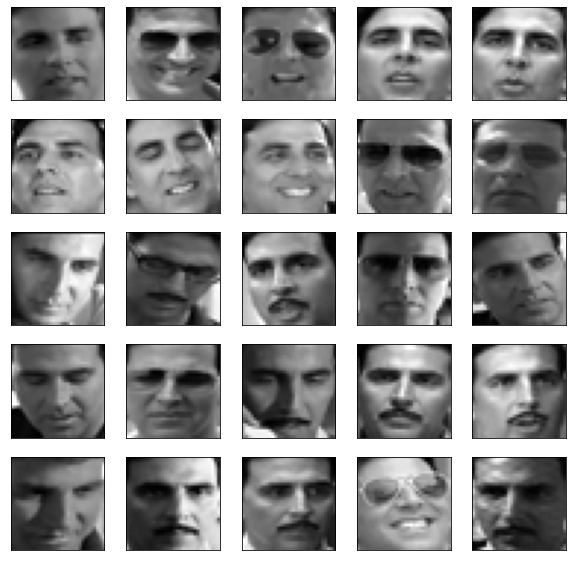

Eigen Faces:


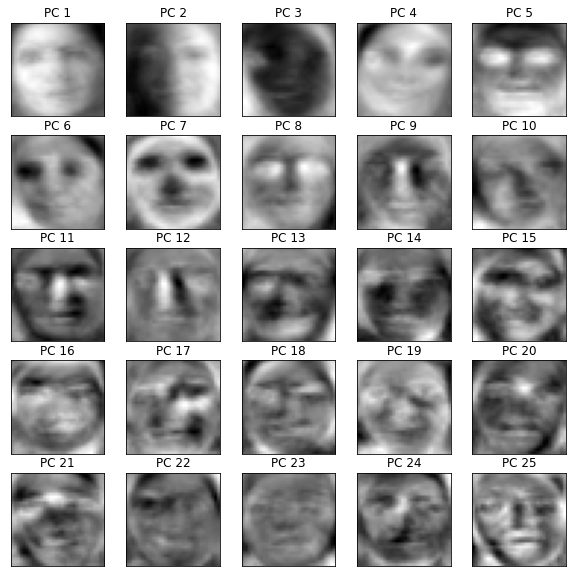

In [39]:
originalPhotos(X)
X_k = get_pca(X,0.92)
eigenFaces(pca)

### IIIT-CFW Dataset

Original Images:


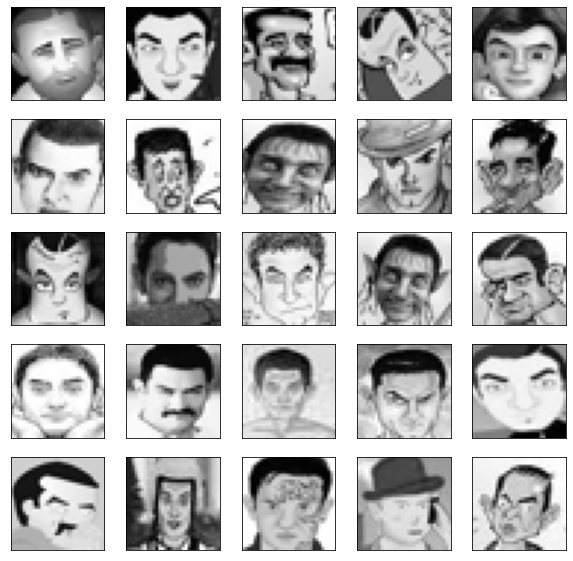

Eigen Faces:


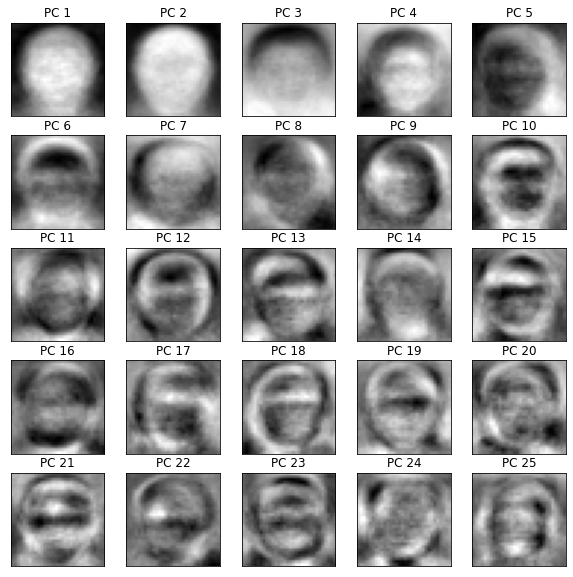

In [40]:
originalPhotos(X_1)
X_k = get_pca(X_1,0.92)
eigenFaces(pca)

### Yale Faces Database

Original Images:


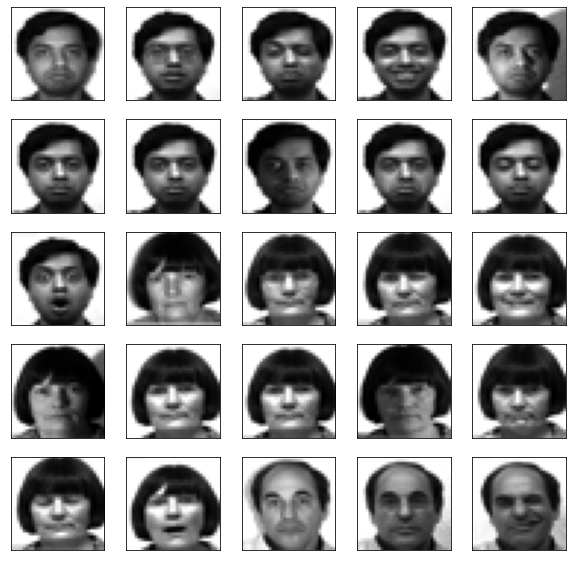

Eigen Faces:


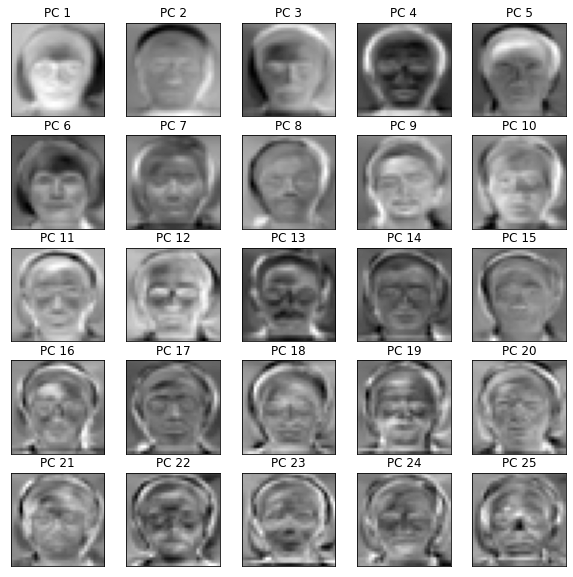

In [41]:
originalPhotos(X_2)
X_k = get_pca(X_2,0.92)
eigenFaces(pca)

## Answer 1(b)

IMFDB database

For this dataset, the "elbow" in the scree plot is at 3, and can be seen that after 10-11 principle components, the percentage of variance becomes too little and can be neglected. Therefore, 10-11 eigenvectors/eigenfaces are required to satisfactorily reconstruct a person. 

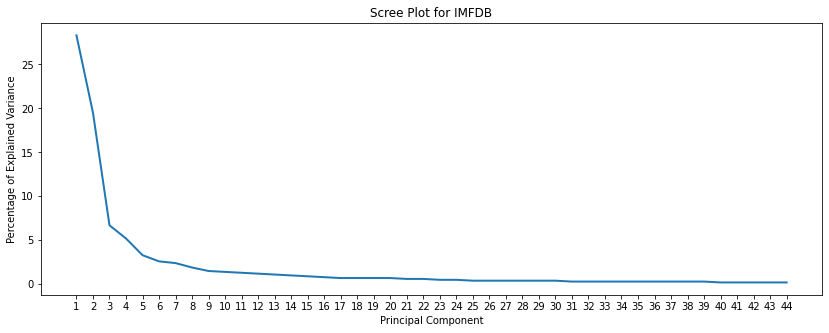

In [42]:
get_pca(X, 0.90)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(14, 5))
plt.plot(labels, per_var, linewidth=2)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot for IMFDB')
plt.show()

IIIT-CFW Dataset

For this dataset, the "elbow" in the scree plot is at 6 principle components, after 6, the percentage of variance becomes too little and can be neglected. Therefore, 6 eigenvectors/eigenfaces are required to satisfactorily reconstruct a person. 

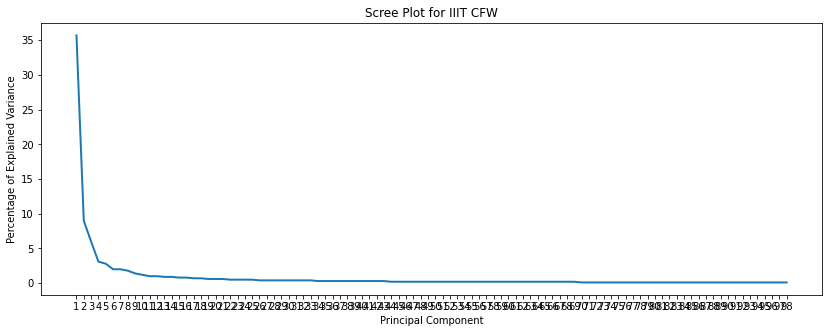

In [43]:
get_pca(X_1, 0.90)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(14, 5))
plt.plot(labels, per_var, linewidth=2)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot for IIIT CFW')
plt.show()

Yale Face Database

For this dataset, the "elbow" in the scree plot is at 11, and can be seen that after 24-25 principle components, the percentage of variance becomes too little and can be neglected. Therefore, 24-25 eigenvectors/eigenfaces are required to satisfactorily reconstruct a person. 

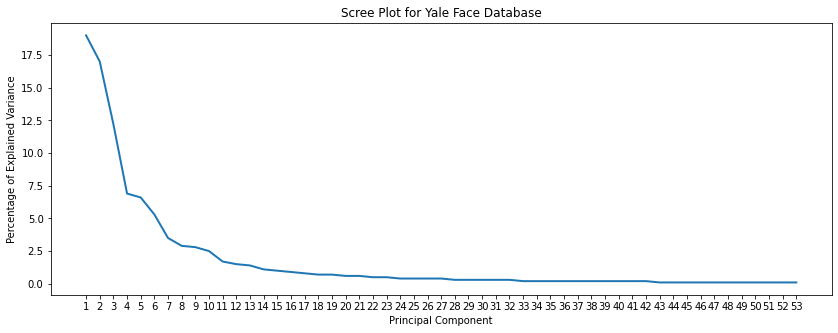

In [44]:
get_pca(X_2, 0.97)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(14, 5))
plt.plot(labels, per_var, linewidth=2)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot for Yale Face Database')
plt.show()

## Answer 1(c)

Below are the reconstructed images for each dataset

In [45]:
def reconstruct_images(X, X_k, n, d, ind):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    numFaces = n              # number of faces to plot
    ds = d#[0,5,10,20,100,200,300,350]   # number of SVD approximations
    Z = X_k
    inds = ind 
    nd = len(ds)

    # Set figure size
    plt.figure(figsize=(1.8 * (nd+1), 2.4 * numFaces))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

    # Loop over figures
    i = 0
    for ind in inds:
      for d in ds:
        plt.subplot(numFaces,nd+1,i+1)
        Zd = np.copy(Z[ind,:])
        Zd[d:] = 0
        XiT = pca.inverse_transform(Zd)

            
        plot_face(XiT)
        plt.title('d={0:d}'.format(d))
        i += 1
    
    # Plot the original face
      plt.subplot(numFaces,nd+1,i+1)
      plot_face(X[ind,:])
      plt.title('Original')
      i += 1  

def plot_face(x):
    h = 32
    w = 32
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

Reconstructed IMFDB images

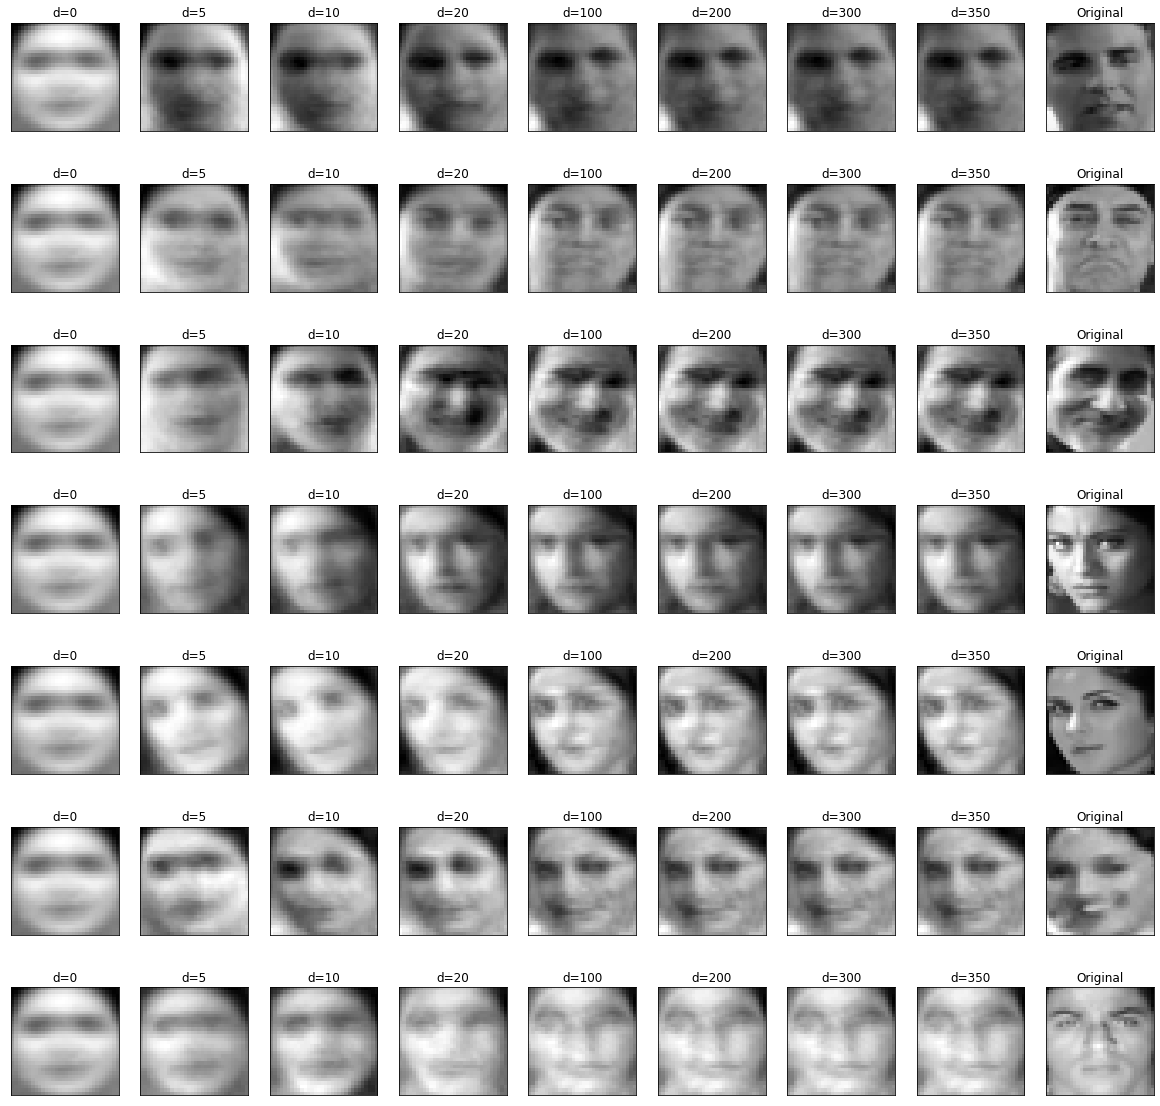

In [46]:
reconstruct_images(X, get_pca(X, 0.90), 8, [0,5,10,20,100,200,300,350],np.array([0,50,100,150,200,250,300]))

Reconstruction of IIIT-CFW 

ValueError: ignored

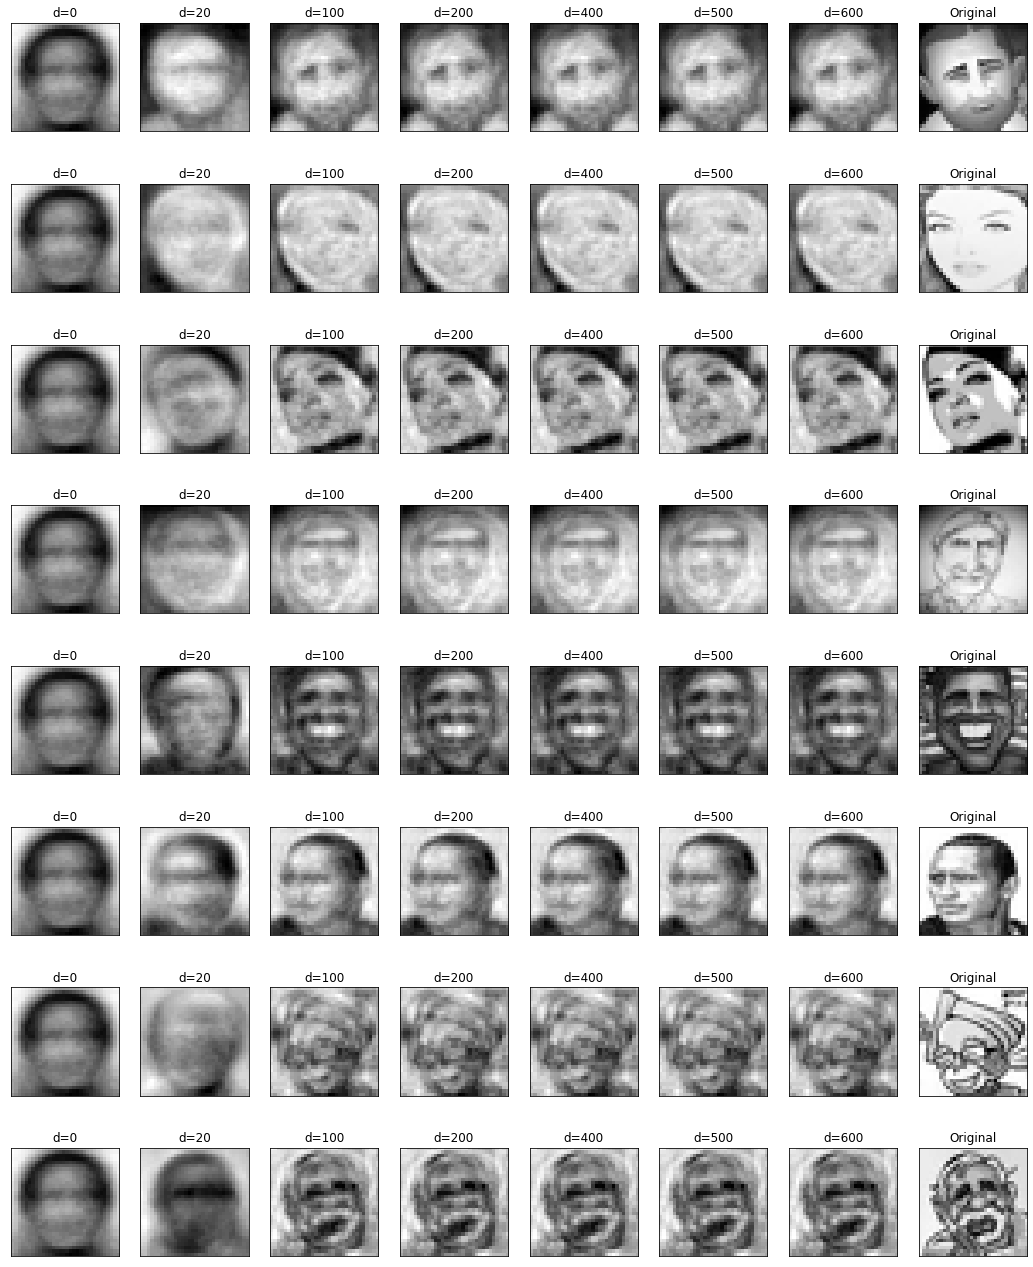

In [47]:
reconstruct_images(X_1, get_pca(X_1, 0.90), 8, [0,20,100,200,400,500,600],np.array([0,50,134,170,230,320,410,520,650]))

Reconstruction of Yale Face Dataset images

ValueError: ignored

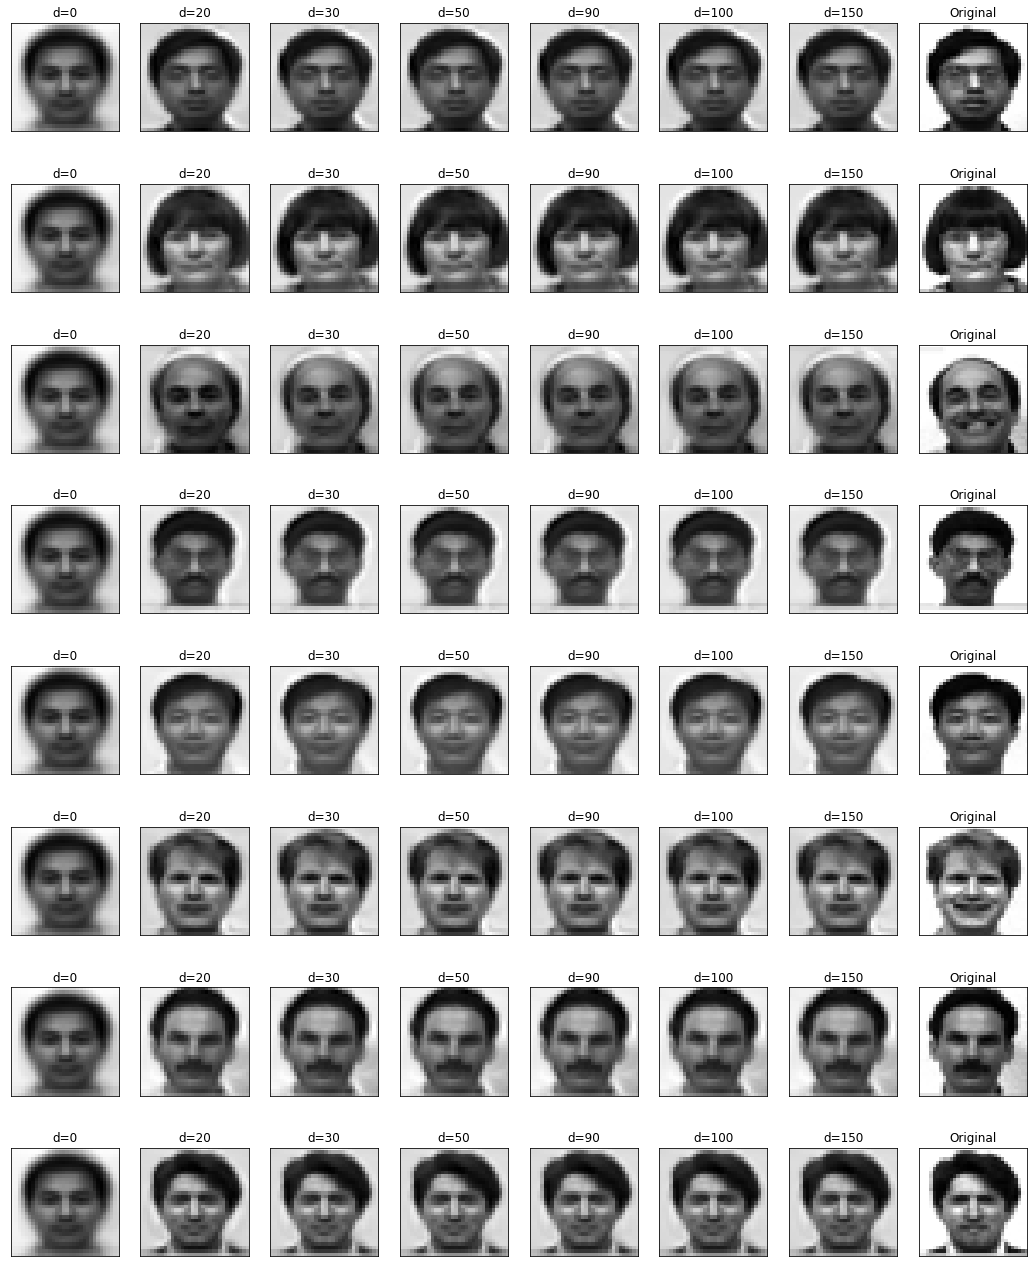

In [48]:
reconstruct_images(X_2, get_pca(X_2, 0.90), 8, [0,20,30,50,90,100,150],np.array([1,12,25,39,49,69,83,96,109,118,132,144,159,168]))

### Answer 1(d)
 

In my opinion, the IIIT-CFW dataset is the most difficult to reconstruct with the least number of eigenfaces. I believe it is because the original dataset doesn't have high quality images. 

Example:
In the image below, you can see the original image. It is not very clear, this would make it difficult to reconstruct with lesser number of eigenfaces in my opinion.
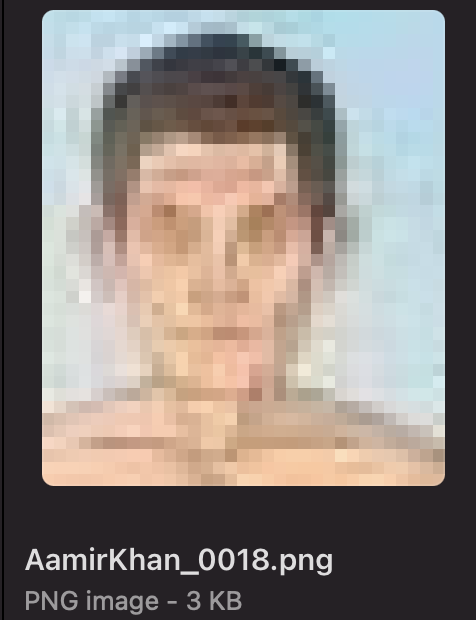 


In the IMFDB dataset, the most difficult persons to be reconstructed would be with the lease number of eigenvectors would be classes 1,3, and 5 as can be seen in the t-SNE plot as well. These classes are Kajol, Shilpa Shetty, and Katrina Kaif respectively. I think these would need more eigenvectors as their images are quite similar to one another.

## Question 2

2(a) Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. Write code from scratch making Classifer as a class and functions of training, validation and confusion matrix etc.

2(b) Which method works well? Do a comparitive study. 



### Answer 2(a)

In [49]:
def allClassifiers(feature,y):

  x = feature
  y = y

  skfolds = StratifiedKFold(n_splits = 2)  #K folds 
  mlp_accu_stratified = []
  log_reg_accu_stratified = []
  dtree_accu_stratified = []
  svm_accu_stratified = []


  for train, test in skfolds.split(x, y):
    
    print("------------------------------ MLP ----------------------------")
    mlp = MLPClassifier(random_state=0, max_iter=500)
    mlp.fit(x[train],y[train])
    pred = mlp.predict(x[test])
    print(classification_report(y[test], pred))
    #print("Confusion Matrix for MLP: ")
    mlp_accu_stratified.append(accuracy_score(y[test], pred))
    #plot_confusion_matrix(mlp, x[test], y[test], cmap='OrRd')
    #plt.show()
    print('---------------------------------------------------------------')
    
    
    print("-------------------- LOGISTIC REGRESSION ----------------------")
    log_reg = LogisticRegression(random_state=0, max_iter=400)
    log_reg.fit(x[train], y[train])
    print(classification_report(y[test], log_reg.predict(x[test])))
    log_reg_accu_stratified.append(accuracy_score(y[test], log_reg.predict(x[test])))
    #print("Confusion Matrix for Logistic Regression: ")
    #plot_confusion_matrix(log_reg, x[test], y[test], cmap='OrRd')
    #plt.show()
    print('---------------------------------------------------------------')


    
    print("------------------------- DECISION TREE -----------------------")
    dtree = DecisionTreeClassifier(random_state=0)
    dtree.fit(x[train], y[train])
    print(classification_report(y[test], dtree.predict(x[test])))
    dtree_accu_stratified.append(accuracy_score(y[test], dtree.predict(x[test])))
    #print("Confusion Matrix for Decision Tree: ")
    #plot_confusion_matrix(dtree, x[test], y[test], cmap='OrRd')
    #plt.show()
    print('---------------------------------------------------------------')

    

    print("---------------------------- SVM ------------------------------")
    svmachine = svm.SVC(kernel='linear')
    svmachine.fit(x[train], y[train])
    print(classification_report(y[test], svmachine.predict(x[test])))
    svm_accu_stratified.append(accuracy_score(y[test], svmachine.predict(x[test])))
    #print("Confusion Matrix for SVM: ")
    #plot_confusion_matrix(svmachine, x[test], y[test], cmap='OrRd')
    #plt.show
  
  return(accuracy(mlp_accu_stratified, log_reg_accu_stratified, dtree_accu_stratified, svm_accu_stratified))


def accuracy(m,l,d,s):
  accuracy_mlp = (sum(m)/len(m)) * 100
  accuracy_log_reg = (sum(l)/len(l)) * 100
  accuracy_dtree = (sum(d)/len(d)) * 100
  accuracy_svm = (sum(s)/len(s)) * 100

  max_acc = max(m,l,d,s)
  
  if max_acc == m:
    model = 'MultiLayer Perceptron'
  elif max_acc == l:
    model = 'Logistic Regression'
  elif max_acc == d:
    model = 'Decision Tree'
  else:
    model = 'Support Vector Machine'

  print('-----------------------------------------------------------------------')
  print('MODEL                                        ACCURACY                ')
  print('-----------------------------------------------------------------------')
  print('MultiLayer Perceptron                        ',accuracy_mlp)
  print('Logistic Regression                          ',accuracy_log_reg)
  print('Decision Tree.                               ',accuracy_dtree)
  print('Support Vector Machine                       ',accuracy_svm)

  return(model, max_acc)

#### Comparing accuracy of various classifiers on IMFDB Database 

In [50]:
print("For PCA")
max_pca_imfdb = allClassifiers(get_pca(X,0.97),y)

For PCA
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       0.40      0.68      0.51        25
           1       0.29      0.32      0.30        25
           2       0.45      0.52      0.48        25
           3       0.38      0.40      0.39        25
           4       0.59      0.40      0.48        25
           5       0.50      0.28      0.36        25
           6       0.32      0.32      0.32        25
           7       0.47      0.36      0.41        25

    accuracy                           0.41       200
   macro avg       0.43      0.41      0.41       200
weighted avg       0.43      0.41      0.41       200

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------
              precision    recall  f1-score   support

           0       0.51      0.92      0.66        25
           1       0.32      0.40      0

In [51]:
print("For Kernel PCA")
max_kpca_imfdb = allClassifiers(get_kernel_pca(X, 100, 'rbf'),y)

For Kernel PCA
------------------------------ MLP ----------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.76      1.00      0.86        25
           1       0.45      0.52      0.48        25
           2       0.53      0.84      0.65        25
           3       0.65      0.44      0.52        25
           4       0.94      0.60      0.73        25
           5       0.76      0.76      0.76        25
           6       0.75      0.72      0.73        25
           7       0.69      0.44      0.54        25

    accuracy                           0.67       200
   macro avg       0.69      0.66      0.66       200
weighted avg       0.69      0.67      0.66       200

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        25
           1       0.50      0.40      0.44        25
           2       0.48      0.40      0.43        25
    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [52]:
print("For LDA")
max_lda_imfdb = allClassifiers(get_lda(X,y,7),y)

For LDA
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       1.00      1.00      1.00        25
           2       1.00      0.92      0.96        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        25
           6       0.93      1.00      0.96        25
           7       1.00      1.00      1.00        25

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       1.00      1.00      1

In [53]:
print("For Kernel LDA")
max_kpca_imfdb = allClassifiers(get_kernel_lda(X, y, 7),y)

For Kernel LDA
------------------------------ MLP ----------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.45      0.56      0.50        25
           2       0.42      0.52      0.46        25
           3       0.37      0.28      0.32        25
           4       0.56      0.60      0.58        25
           5       0.77      0.68      0.72        25
           6       0.54      0.52      0.53        25
           7       0.50      0.36      0.42        25

    accuracy                           0.56       200
   macro avg       0.55      0.56      0.55       200
weighted avg       0.55      0.56      0.55       200

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        25
           1       0.40      0.48      0.44        25
           2       0.52      0.60      0.56        25
    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [54]:
print("For VGG")
max_vgg_imfdb = allClassifiers(get_vgg_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IMFDB/VGG19_features.npy'),y)

For VGG
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.64      0.64      0.64        25
           2       0.85      0.92      0.88        25
           3       1.00      0.84      0.91        25
           4       0.83      0.80      0.82        25
           5       0.93      1.00      0.96        25
           6       0.83      1.00      0.91        25
           7       1.00      0.76      0.86        25

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       0.71      0.68      0.69        25
           2       0.86      0.96      0.91        25
           3       1.00      0.84      0.91        25
           4       0.90      0.76      0.83        25
           5       0.86      1.00      0.93        25
           6       0.80      0.96      0.87        25
           7       1.00      0.76      0.86        25

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200

---------------------------------------------------------------
------------------------- DECISION TREE -----------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       0.62      0.64      0.63        25
           2       0.83      1.00      0.91        25
    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.73      0.88      0.80        25
           2       0.95      0.84      0.89        25
           3       0.85      0.88      0.86        25
           4       0.92      0.96      0.94        25
           5       0.96      0.88      0.92        25
           6       0.95      0.80      0.87        25
           7       0.86      1.00      0.93        25

    accuracy                           0.89       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.89      0.89       200

---------------------------------------------------------------
------------------------- DECISION TREE -----------------------
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.61      0.80      0.69        25
           2       1.00      0.88      0.94        25
    

In [55]:
print("For ResNet")
max_resnet_imfdb = allClassifiers(get_vgg_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IMFDB/resnet50_features.npy'),y)

For ResNet
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.83      1.00      0.91        25
           2       1.00      0.92      0.96        25
           3       1.00      0.88      0.94        25
           4       0.96      0.96      0.96        25
           5       0.93      1.00      0.96        25
           6       0.92      0.88      0.90        25
           7       1.00      0.96      0.98        25

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.86      1.00      0.93        25
           2       1.00      0.92      0.96        25
           3       1.00      0.92      0.96        25
           4       0.96      0.96      0.96        25
           5       0.93      1.00      0.96        25
           6       0.92      0.88      0.90        25
           7       1.00      0.96      0.98        25

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.95      0.96       200

---------------------------------------------------------------
------------------------- DECISION TREE -----------------------
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        25
           1       0.92      0.92      0.92        25
           2       0.91      0.84      0.87        25
    

#### Comparing accuracy of various classifiers on IIIT-CFW Database            

In [56]:
print("For PCA")
max_pca_IIIT = allClassifiers(get_pca(X_1,0.97), y_1)

For PCA
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       0.19      0.20      0.19        25
           1       0.40      0.10      0.15        21
           2       0.33      0.38      0.36        39
           3       0.37      0.27      0.31        51
           4       0.27      0.36      0.31        50
           5       0.26      0.20      0.23        50
           6       0.36      0.40      0.38        50
           7       0.30      0.36      0.32        50

    accuracy                           0.30       336
   macro avg       0.31      0.28      0.28       336
weighted avg       0.31      0.30      0.30       336

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------
              precision    recall  f1-score   support

           0       0.08      0.04      0.05        25
           1       0.67      0.19      0

In [57]:
print("For Kernel PCA")
max_kpca_IIIT = allClassifiers(get_kernel_pca(X_1, 100, 'rbf'),y_1)

For Kernel PCA
------------------------------ MLP ----------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.44      0.32      0.37        25
           1       0.37      0.33      0.35        21
           2       0.40      0.36      0.38        39
           3       0.52      0.59      0.55        51
           4       0.44      0.46      0.45        50
           5       0.49      0.54      0.51        50
           6       0.46      0.46      0.46        50
           7       0.51      0.50      0.51        50

    accuracy                           0.47       336
   macro avg       0.45      0.45      0.45       336
weighted avg       0.46      0.47      0.46       336

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        25
           1       0.00      0.00      0.00        21
           2       0.41      0.41      0.41        39
    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print("For LDA")
max_lda_IIIT = allClassifiers(get_lda(X_1,y_1,7), y_1)


For LDA
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        39
           3       0.98      0.92      0.95        51
           4       0.96      0.98      0.97        50
           5       0.96      1.00      0.98        50
           6       0.94      1.00      0.97        50
           7       1.00      0.98      0.99        50

    accuracy                           0.98       336
   macro avg       0.98      0.98      0.98       336
weighted avg       0.98      0.98      0.98       336

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1

In [59]:
print("For Kernel LDA")
max_kpca_imfdb = allClassifiers(get_kernel_lda(X_1, y_1, 7),y_1)

For Kernel LDA
------------------------------ MLP ----------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.33      0.20      0.25        25
           1       0.64      0.33      0.44        21
           2       0.48      0.41      0.44        39
           3       0.46      0.63      0.53        51
           4       0.47      0.46      0.46        50
           5       0.39      0.48      0.43        50
           6       0.40      0.40      0.40        50
           7       0.47      0.44      0.45        50

    accuracy                           0.44       336
   macro avg       0.46      0.42      0.43       336
weighted avg       0.45      0.44      0.44       336

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------
              precision    recall  f1-score   support

           0       0.27      0.12      0.17        25
           1       0.31      0.24      0.27        21
           2       0.42      0.46      0.44        39
    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [60]:
print("For VGG")
max_vgg_IIIT = allClassifiers(get_vgg_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IIIT-CFW/VGG19_features.npy'),y_1)



For VGG
------------------------------ MLP ----------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.45      0.60      0.52        25
           1       0.44      0.33      0.38        21
           2       0.49      0.51      0.50        39
           3       0.81      0.84      0.83        51
           4       0.57      0.48      0.52        50
           5       0.80      0.86      0.83        50
           6       0.90      0.86      0.88        50
           7       0.65      0.64      0.65        50

    accuracy                           0.68       336
   macro avg       0.64      0.64      0.64       336
weighted avg       0.67      0.68      0.67       336

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.42      0.60      0.49        25
           1       0.50      0.43      0.46        21
           2       0.49      0.44      0.46        39
           3       0.83      0.86      0.85        51
           4       0.64      0.50      0.56        50
           5       0.80      0.86      0.83        50
           6       0.88      0.90      0.89        50
           7       0.68      0.68      0.68        50

    accuracy                           0.69       336
   macro avg       0.65      0.66      0.65       336
weighted avg       0.69      0.69      0.69       336

---------------------------------------------------------------
------------------------- DECISION TREE -----------------------
              precision    recall  f1-score   support

           0       0.50      0.52      0.51        25
           1       0.42      0.52      0.47        21
           2       0.45      0.46      0.46        39
    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.41      0.28      0.33        25
           1       0.42      0.24      0.30        21
           2       0.48      0.62      0.54        40
           3       0.88      0.74      0.80        50
           4       0.57      0.64      0.60        50
           5       0.93      0.78      0.85        50
           6       0.80      0.90      0.85        50
           7       0.66      0.78      0.72        50

    accuracy                           0.68       336
   macro avg       0.64      0.62      0.63       336
weighted avg       0.69      0.68      0.68       336

---------------------------------------------------------------
------------------------- DECISION TREE -----------------------
              precision    recall  f1-score   support

           0       0.44      0.32      0.37        25
           1       0.50      0.38      0.43        21
           2       0.47      0.50      0.48        40
    

In [61]:
print("For ResNet")
max_resnet_IIIT = allClassifiers(get_vgg_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IIIT-CFW/resnet50_features.npy'),y_1)

For ResNet
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.95      0.95      0.95        21
           2       0.95      0.97      0.96        39
           3       1.00      0.98      0.99        51
           4       0.98      0.98      0.98        50
           5       0.98      0.96      0.97        50
           6       1.00      1.00      1.00        50
           7       0.94      0.96      0.95        50

    accuracy                           0.97       336
   macro avg       0.97      0.97      0.97       336
weighted avg       0.97      0.97      0.97       336

---------------------------------------------------------------
-------------------- LOGISTIC REGRESSION ----------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.95      0.95    

#### Comparing accuracy of various classifiers on Yale Face Database

In [62]:
print("For PCA")
max_pca_YFD = allClassifiers(get_pca(X_2,0.97),y_2)

For PCA
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       1.00      0.80      0.89         5
           2       0.50      0.50      0.50         6
           3       0.80      0.80      0.80         5
           4       1.00      0.67      0.80         6
           5       0.67      0.80      0.73         5
           6       1.00      0.50      0.67         6
           7       0.50      0.60      0.55         5
           8       0.60      0.50      0.55         6
           9       0.86      1.00      0.92         6
          10       0.50      0.80      0.62         5
          11       0.71      0.83      0.77         6
          12       0.67      0.80      0.73         5
          13       0.62      0.83      0.71         6
          14       0.75      0.60      0.67         5

    accuracy                           0.70        83
   macro

In [63]:
print("For Kernel PCA")
max_kpca_YFD = allClassifiers(get_kernel_pca(X_2, 100, 'rbf'),y_2)

For Kernel PCA
------------------------------ MLP ----------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         6
           3       1.00      0.80      0.89         5
           4       1.00      0.83      0.91         6
           5       1.00      0.80      0.89         5
           6       1.00      0.67      0.80         6
           7       0.80      0.80      0.80         5
           8       1.00      0.83      0.91         6
           9       0.83      0.83      0.83         6
          10       0.42      1.00      0.59         5
          11       0.75      1.00      0.86         6
          12       1.00      0.80      0.89         5
          13       0.83      0.83      0.83         6
          14       1.00      0.80      0.89         5

    accuracy                           0.83        83
   macro avg       0.89      0.83      0.84        83
weighted avg       0.89   

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
print("For LDA")
max_lda_YFD = allClassifiers(get_lda(X_2,y_2,7),y_2)


For LDA
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         5

    accuracy                           1.00        83
   macro

In [65]:
print("For Kernel LDA")
max_kpca_imfdb = allClassifiers(get_kernel_lda(X_2, y_2, 7),y_2)

For Kernel LDA
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.80      0.80      0.80         5
           2       0.80      0.67      0.73         6
           3       1.00      0.80      0.89         5
           4       0.86      1.00      0.92         6
           5       0.57      0.80      0.67         5
           6       1.00      0.50      0.67         6
           7       0.44      0.80      0.57         5
           8       1.00      0.83      0.91         6
           9       1.00      0.67      0.80         6
          10       1.00      1.00      1.00         5
          11       0.83      0.83      0.83         6
          12       0.71      1.00      0.83         5
          13       1.00      1.00      1.00         6
          14       1.00      0.80      0.89         5

    accuracy                           0.82        83
 

In [66]:
print("For VGG")
max_vgg_YFD = allClassifiers(get_vgg_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/Yale_face_database/VGG19_features.npy'),y_2)



For VGG
------------------------------ MLP ----------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.60      0.55         5
           2       0.30      0.50      0.37         6
           3       0.67      0.40      0.50         5
           4       0.44      0.67      0.53         6
           5       0.33      0.60      0.43         5
           6       1.00      0.50      0.67         6
           7       0.71      1.00      0.83         5
           8       0.67      0.33      0.44         6
           9       0.29      0.33      0.31         6
          10       1.00      0.80      0.89         5
          11       0.67      0.67      0.67         6
          12       0.56      1.00      0.71         5
          13       0.00      0.00      0.00         6
          14       0.75      0.60      0.67         5

    accuracy                           0.52        83
   macro avg       0.53      0.53      0.50        83
weighted avg       0.52   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.40      0.40      0.40         5
           2       0.22      0.33      0.27         6
           3       0.75      0.60      0.67         5
           4       0.44      0.67      0.53         6
           5       0.43      0.60      0.50         5
           6       1.00      0.33      0.50         6
           7       0.83      1.00      0.91         5
           8       0.67      0.33      0.44         6
           9       0.25      0.33      0.29         6
          10       1.00      0.80      0.89         5
          11       0.67      0.67      0.67         6
          12       0.40      0.80      0.53         5
          13       0.25      0.17      0.20         6
          14       0.75      0.60      0.67         5

    accuracy                           0.51        83
   macro avg       0.57      0.52      0.51        83
weighted avg       0.56   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.40      0.33      0.36         6
           2       0.25      0.20      0.22         5
           3       0.38      0.50      0.43         6
           4       0.50      0.60      0.55         5
           5       1.00      0.17      0.29         6
           6       0.67      0.80      0.73         5
           7       0.75      0.50      0.60         6
           8       0.29      0.40      0.33         5
           9       0.60      0.60      0.60         5
          10       1.00      1.00      1.00         6
          11       0.43      0.60      0.50         5
          12       1.00      0.33      0.50         6
          13       0.25      0.20      0.22         5
          14       0.40      0.67      0.50         6

    accuracy                           0.50        82
   macro avg       0.56      0.50      0.49        82
weighted avg       0.57   

In [67]:
print("For ResNet")
max_resnet_YFD = allClassifiers(get_vgg_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/Yale_face_database/resnet50_features.npy'),y_2)


For ResNet
------------------------------ MLP ----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         6
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         5

    accuracy                           0.99        83
   ma

### Answer 2(b)

For different dataset, different model-feature combinations worked best. 

For each feature type, the best model can be seen below. 

IMFDB Database

For the IMFDB dataset, best feature-model combination was ResNet50 and logistic regression

In [68]:
fdata = ['PCA', 'KernelPCA', 'LDA', 'VGG', 'RESNET']
mdata = [max_pca_imfdb[0], max_kpca_imfdb[0], max_lda_imfdb[0], max_vgg_imfdb[0], max_resnet_imfdb[0]]
adata = [sum(max_pca_imfdb[1])/2, sum(max_kpca_imfdb[1])/2, sum(max_lda_imfdb[1])/2, sum(max_vgg_imfdb[1])/2, sum(max_resnet_imfdb[1])/2]

df_IMFDB = pd.DataFrame()
df_IMFDB['Feature'] = fdata
df_IMFDB['Model'] = mdata
df_IMFDB['Accuracy'] = adata


df_IMFDB

,Feature,Model,Accuracy
0,PCA,Logistic Regression,0.515000
1,KernelPCA,Logistic Regression,0.903247
2,LDA,MultiLayer Perceptron,0.982500
3,VGG,Logistic Regression,0.880000
4,RESNET,Logistic Regression,0.960000


 IIIT_CFW Database

For the IIIT-CFW dataset, the best feature combination is LDA and logistic regression

In [69]:
fdata = ['PCA', 'KernelPCA', 'LDA', 'VGG', 'RESNET']
mdata = [max_pca_IIIT[0], max_kpca_IIIT[0], max_lda_IIIT[0], max_vgg_IIIT[0], max_resnet_IIIT[0]]
adata = [sum(max_pca_IIIT[1])/2, sum(max_kpca_IIIT[1])/2, sum(max_lda_IIIT[1])/2, sum(max_vgg_IIIT[1])/2, sum(max_resnet_IIIT[1])/2]

df_IIIT = pd.DataFrame()
df_IIIT['Feature'] = fdata
df_IIIT['Model'] = mdata
df_IIIT['Accuracy'] = adata


df_IIIT

,Feature,Model,Accuracy
0,PCA,Logistic Regression,0.316964
1,KernelPCA,MultiLayer Perceptron,0.502976
2,LDA,Logistic Regression,0.973214
3,VGG,Logistic Regression,0.686012
4,RESNET,Support Vector Machine,0.968750


Yale Face Database

For the Yale face database, best feature-model combination is LDA and multiLayer Perceptron

In [70]:
fdata = ['PCA', 'KernelPCA', 'LDA', 'VGG', 'RESNET']
mdata = [max_pca_YFD[0], max_kpca_YFD[0], max_lda_YFD[0], max_vgg_YFD[0], max_resnet_YFD[0]]
adata = [sum(max_pca_YFD[1])/2, sum(max_kpca_YFD[1])/2, sum(max_lda_YFD[1])/2, sum(max_vgg_YFD[1])/2, sum(max_resnet_IIIT[1])/2]

df_YFD = pd.DataFrame()
df_YFD['Feature'] = fdata
df_YFD['Model'] = mdata
df_YFD['Accuracy'] = adata


df_YFD

,Feature,Model,Accuracy
0,PCA,Logistic Regression,0.945563
1,KernelPCA,MultiLayer Perceptron,0.885175
2,LDA,MultiLayer Perceptron,1.000000
3,VGG,MultiLayer Perceptron,0.527329
4,RESNET,MultiLayer Perceptron,0.968750


## Question 3

3.Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? 

In [71]:
def plot_tsne(features,y, title):

  X = features
  y=y
  
  temp = TSNE(n_components=2, perplexity=40, n_iter=5000, random_state=0)
  tsne_1 = temp.fit_transform(X)

  x_min, x_max = np.min(X,0), np.max(X,0)
  X = (X - x_min)/(x_max - x_min)
  plt.figure(figsize=(10,10))
  ax = plt.subplot(111)
  for i in range(X.shape[0]):
    plt.text(X[i, 0], X[i,1], str(y[i]),
             c=plt.cm.Set1(y[i]/10.),
             weight='bold',
             size=5)
    plt.xticks([]), plt.yticks([])
    plt.title(title)

### t-SNE for IMFDB dataset

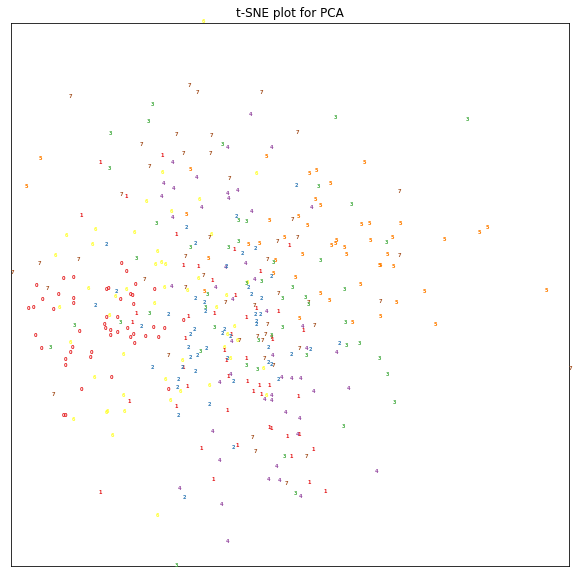

In [72]:
plot_tsne(get_pca(X,0.97), y, "t-SNE plot for PCA")

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1024, 8 - 1) = 7 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


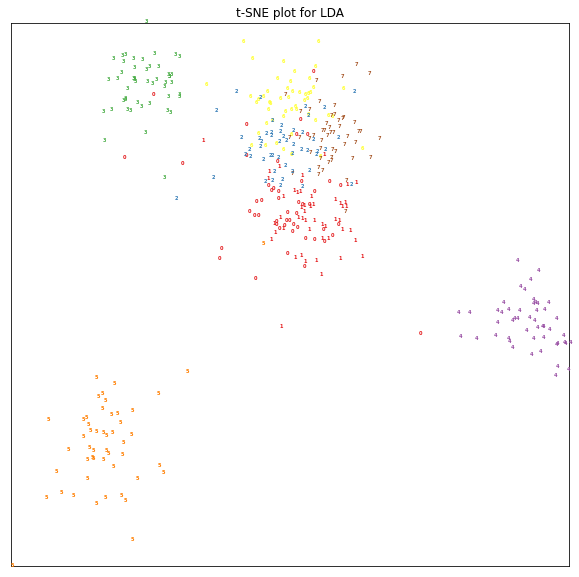

In [73]:
plot_tsne(get_lda(X,y,110), y, "t-SNE plot for LDA")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


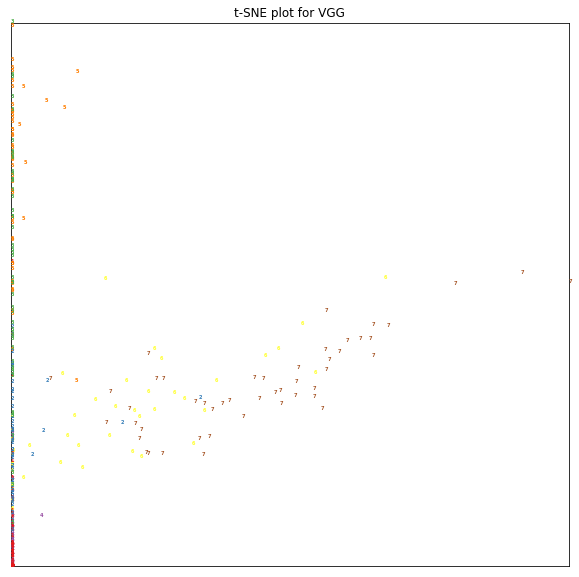

In [74]:
plot_tsne(get_vgg_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IMFDB/VGG19_features.npy'), y, "t-SNE plot for VGG")

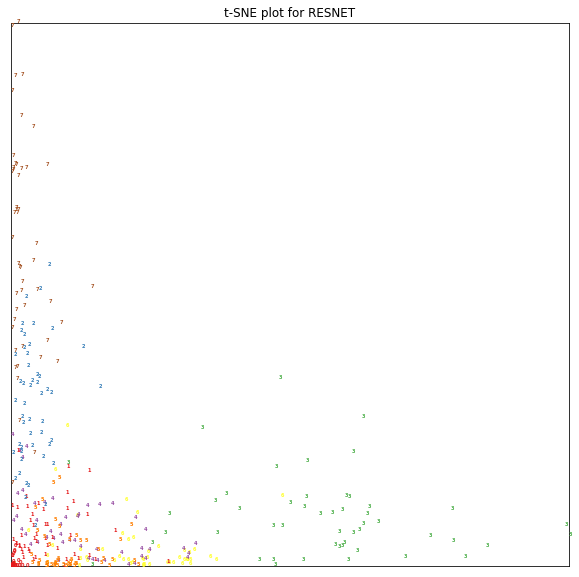

In [75]:
plot_tsne(get_resnet_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IMFDB/resnet50_features.npy'), y,"t-SNE plot for RESNET")

### t-SNE for IIIT-CFW Dataset

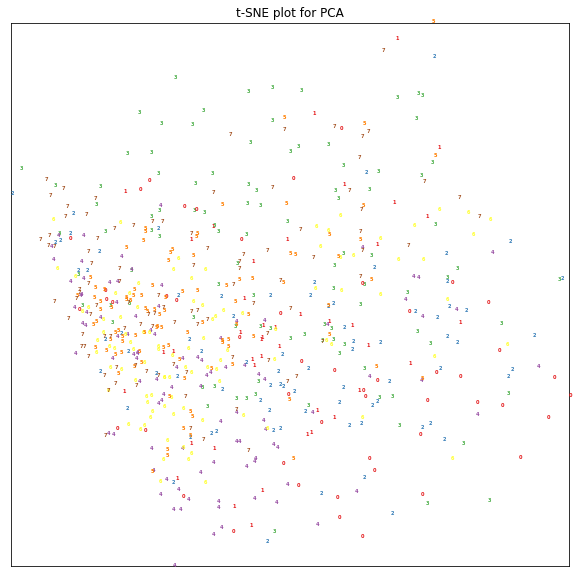

In [76]:
plot_tsne(get_pca(X_1,0.97), y_1, "t-SNE plot for PCA")

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1024, 8 - 1) = 7 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


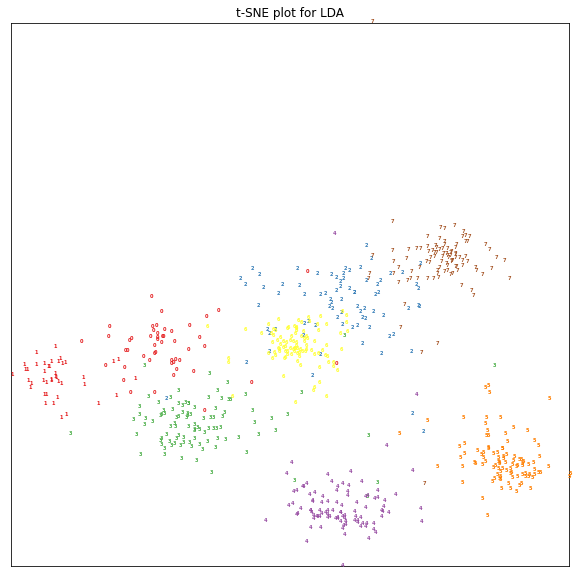

In [77]:
plot_tsne(get_lda(X_1,y_1,110), y_1, "t-SNE plot for LDA")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be fi

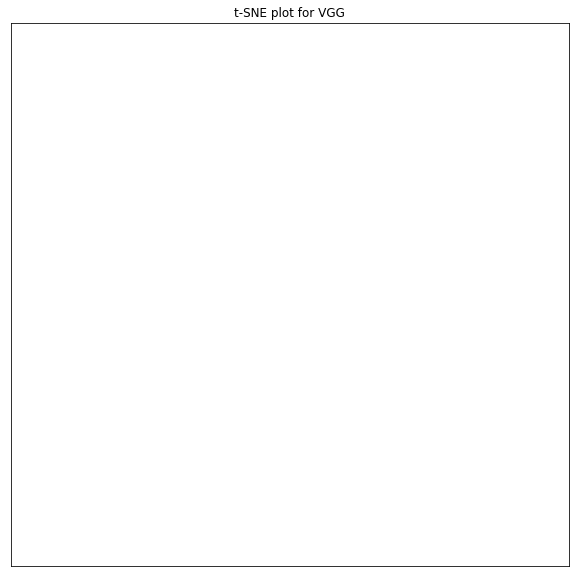

In [78]:
plot_tsne(get_vgg_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/IIIT-CFW/VGG19_features.npy'), y_1, "t-SNE plot for VGG")

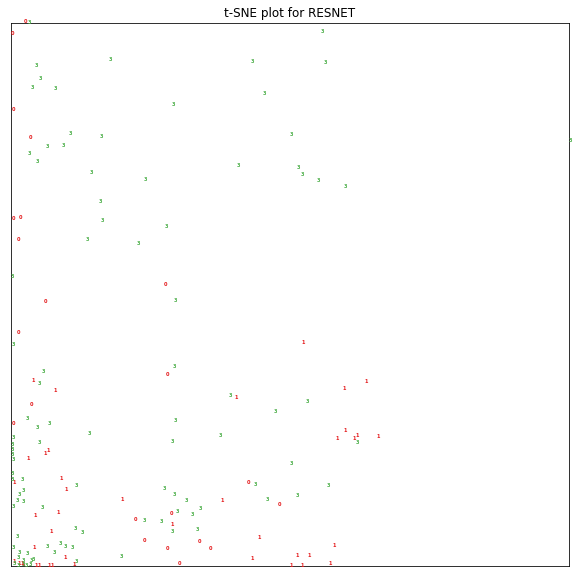

In [79]:
plot_tsne(get_resnet_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/Yale_face_database/resnet50_features.npy'), y_1,"t-SNE plot for RESNET")

### t-SNE for Yale Face Database

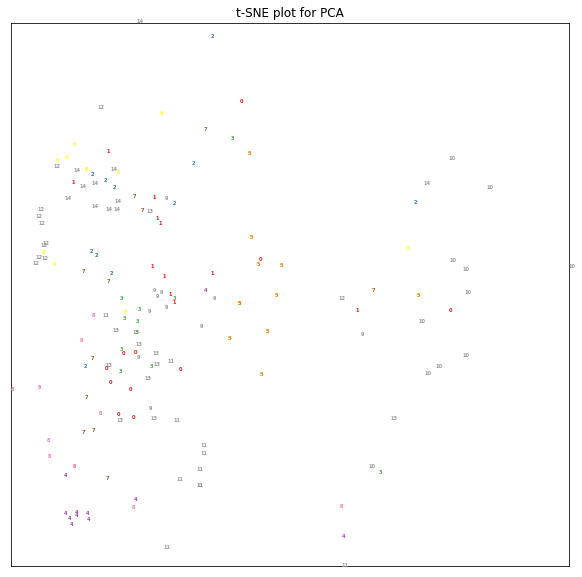

In [80]:
plot_tsne(get_pca(X_2,0.97), y_2, "t-SNE plot for PCA")

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1024, 15 - 1) = 14 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


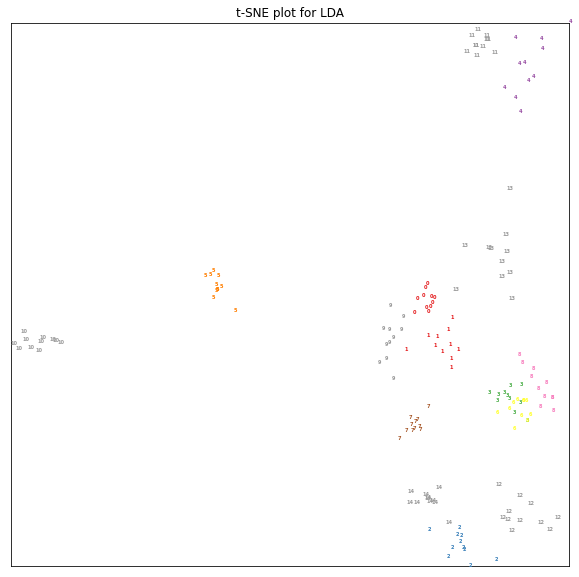

In [81]:
plot_tsne(get_lda(X_2,y_2,110), y_2, "t-SNE plot for LDA")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


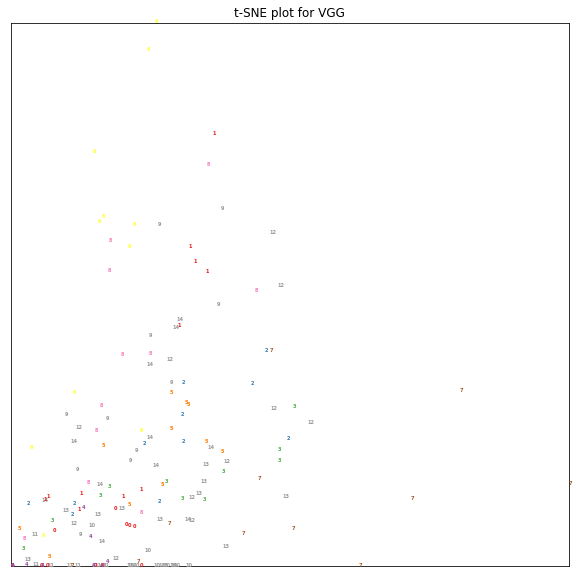

In [82]:
plot_tsne(get_vgg_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/Yale_face_database/VGG19_features.npy'), y_2, "t-SNE plot for VGG")

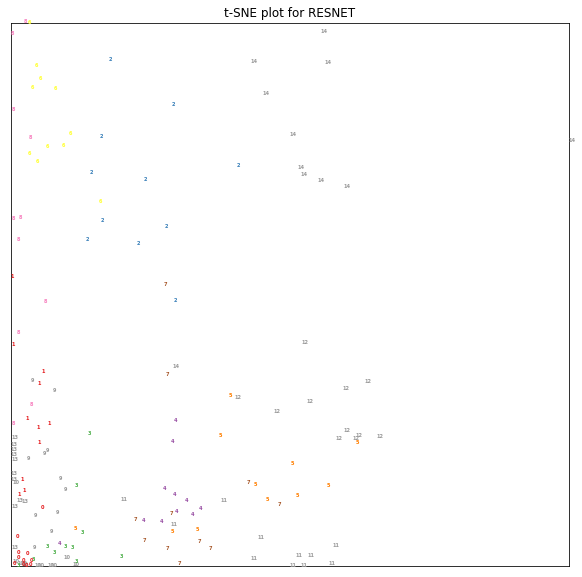

In [83]:
plot_tsne(get_resnet_features('/content/drive/MyDrive/IIIT-H /Assignments /Assignment-1/dataset/Yale_face_database/resnet50_features.npy'), y_2, "t-SNE plot for RESNET")

## Question 4

4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

4(c)Show empirical results  with  all  the  representations

### Answer 4(a)

Face verification could be done via KNN. 

KNN basically classifies a new data point based on how its neighbors' are classified. It does so based on the similarity measure of the earlier stored data points. 

Pipeline for this problem: 
1. Load the dataset (in our case, it is already loaded)
2. Split the dataset into training and testing data. 
3. Using KNeighborsClassifier from sklearn, build the model by fitting the data on the training data.
4. Make a prediction on test data.
5. Calculate the accuracy.
 
 There are various metrices that are available to measure the distance like Manhattan distance, Euclidean distance, Chebyshev distance and Minkowski distance. Therefore, I tried to build a model to test out all these. The results can be visualised below. 

In [84]:
def KNN(X,y):

  x_train, x_test, y_train, y_test = train_test_split(X,y)
  metrics = ['manhattan', 'euclidean', 'chebyshev', 'minkowski']
  df_KNN = pd.DataFrame()
  lsMetrics,acc = [],[]

  for m in metrics:
    neighbors = KNeighborsClassifier(n_neighbors = 5, metric=m)
    neighbors.fit(x_train, y_train)
    y_pred = neighbors.predict(x_test)
    lsMetrics.append(m)
    acc.append(accuracy_score(y_test, y_pred))

  df_KNN['Metrics'] = lsMetrics
  df_KNN['Accuracy'] = acc


  return(df_KNN)

IMFDB

In [85]:
KNN(X,y)

,Metrics,Accuracy
0,manhattan,0.57
1,euclidean,0.56
2,chebyshev,0.30
3,minkowski,0.56


IIIT_CFW

In [86]:
KNN(X_1, y_1)

,Metrics,Accuracy
0,manhattan,0.369048
1,euclidean,0.327381
2,chebyshev,0.208333
3,minkowski,0.327381


Yale Face Database

In [87]:
KNN(X_2, y_2)

,Metrics,Accuracy
0,manhattan,0.833333
1,euclidean,0.785714
2,chebyshev,0.809524
3,minkowski,0.785714


### Answer 4(b)

For this problem, I believe precision would be the right metrics. Precision is the number of correct predictions made and when it comes to face verification, this is highly important. In the answer 4(c), the classification reports of all the datasets are given. 
From that, we can say that the Yale face database has the highest precision score using KNN. 

### Answer 4(c)

In [88]:
def knnComparison(X, y):

  x_train, x_test, y_train, y_test = train_test_split(X,y)

  neighbors = KNeighborsClassifier(n_neighbors = 5, metric='manhattan')
  neighbors.fit(x_train, y_train)
  y_pred = neighbors.predict(x_test)
  print(classification_report(y_test, y_pred))


IMFDB

In [89]:
knnComparison(X,y)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        15
           1       0.29      0.50      0.37        10
           2       0.57      0.87      0.68        15
           3       0.40      0.18      0.25        11
           4       0.89      0.57      0.70        14
           5       0.75      0.82      0.78        11
           6       0.50      0.27      0.35        11
           7       0.75      0.23      0.35        13

    accuracy                           0.58       100
   macro avg       0.60      0.56      0.53       100
weighted avg       0.61      0.58      0.55       100



IIIT-CFW

In [90]:
knnComparison(X_1, y_1)

              precision    recall  f1-score   support

           0       0.19      0.62      0.29         8
           1       0.67      0.40      0.50        10
           2       0.30      0.81      0.44        21
           3       0.53      0.35      0.42        26
           4       0.31      0.41      0.35        27
           5       0.14      0.04      0.07        23
           6       0.69      0.36      0.47        25
           7       0.60      0.11      0.18        28

    accuracy                           0.35       168
   macro avg       0.43      0.39      0.34       168
weighted avg       0.44      0.35      0.33       168



Yale Face Database

In [91]:
knnComparison(X_2, y_2)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.60      0.75      0.67         4
           2       0.83      1.00      0.91         5
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      0.67      0.80         3
          14       0.50      0.50      0.50         2

    accuracy                           0.88        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.90   